# Problem Statement:

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, 
inhale of harmful gases, intake of contaminated food, pickles and drugs.
This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

<span style="color:blue;font-size:25pt;">  1.Business Case        </span>

<span style="font-family: Arial; font-size:1.4em;color:red;"><b>  Task 1:- </b></span> Prepare a complete data analysis report on the given data.

<span style="font-family: Arial; font-size:1.4em;color:red;"><b>  Task 2:- </b></span>Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.

<span style="font-family: Arial; font-size:1.4em;color:red;"><b>  Task 3:- </b></span>Create an analysis to show on what basis you have designed your model.  


<span style="color:blue;font-size:25pt">2.Domain Analysis         </span>     

The liver is the largest solid organ in the body that filters all of the blood in the body and breaks down poisonous substances, such as alcohol and drugs and also produces bile, a fluid that helps digest fats and carry away waste.

1. Liver function tests are blood tests that measure different substances produced by your liver. 

2. These measurements give your healthcare provider important information about the overall health of your liver and how well it’s working.

3. The most common liver tests include:

     <span style="font-family: Arial Black; font-size:1.1em;color:black;">  * Liver Enzymes Test: </span> Your liver enzymes include Alkaline Phosphatase (ALP), Alanine Aminotransferase (ALT), Aspartate Aminotransferase (AST) and . These are elevated when there’s liver injury.
    
     <span style="font-family: Arial Black; font-size:1.1em;color:black;">  * Total Protein Test: </span> A total protein test measures levels of protein in your blood. Your liver makes protein, and low protein levels may indicate that your liver isn’t functioning optimally.
    
     <span style="font-family: Arial Black; font-size:1.1em;color:black;">  * Bilirubin Test: </span>  Bilirubin is a waste product that your liver deposits in bile. Elevated levels of bilirubin may indicate an obstruction of bile flow or a problem in the processing of bile by the liver.
     
     <span style="font-family: Arial Black; font-size:1.1em;color:black;">  * Albumin Test: </span>  This test is used to measure the level of albumin (a protein in the blood) and may be useful in the diagnosis of liver disease. Low levels of albumin may indicate the liver is not functioning properly. 
    
     <span style="font-family: Arial Black; font-size:1.1em;color:black;">  * Albumin and Globulin Ratio: </span>  The normal threshold value of the albumin-to-globulin ratio is 1.0 to 2.0. Underproduction of albumin or overproduction of globulin leads to decrease of the albumin-to-globulin ratio. An inversed albumin-to-globulin ratio (IAGR, <1.0) is often found in patients with severe inflammatory liver diseases or cirrhosis.
    

<span style="color:blue;font-size:25pt">3.Import Statements </span>

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 3.1 We start our analysis by importing necessary modules : </i> </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix , f1_score,recall_score,precision_score,roc_curve, auc
from sklearn.model_selection import train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB,BernoulliNB



<span style="color:blue;font-size:25pt"> 4.Data Collection </span>

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;"> <i> 4.1 Loading the data into pandas dataframe : </i> </span>

In [2]:
# Import the file.
df = pd.read_csv('E:\Datamites\PROJECT\Capstone_project\projects_details\PRCP-1007-LiverPatientPred\Data\Indian_Liver_Patient_Dataset_ILPD.csv')

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 4.2 Examining the data : </i> </span>

In [3]:
# Find the number of rows and columns.
df.shape

(583, 11)

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 4.3 Columns in dataframe : </i> </span>

In [4]:
# Printing the columns.
df.columns

Index(['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin',
       ' Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', ' Albumin',
       ' Albumin and Globulin Ratio', 'Target'],
      dtype='object')

In [5]:
# Renaming the columns , since there is a gap between the column names.

df.rename(columns={'Total Bilirubin' : 'Total_Bilirubin' , 'Direct Bilirubin' : 'Direct_Bilirubin', 'Alamine Aminotransferase' : 'Al_Aminotransferase' , ' Alkaline Phosphotase' : 'Al_Phosphotase', 'Aspartate Aminotransferase' : 'Asp_Aminotransferase' , 'Total Protiens' : 'Total_Protiens', ' Albumin' : 'Albumin',' Albumin and Globulin Ratio' : 'Alb_Glo_Ratio' , 'Target' : 'Has_liver_disease' } , inplace=True)

In [6]:
# Displaying the data.
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Al_Phosphotase,Al_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,Alb_Glo_Ratio,Has_liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


<span style="color:limegreen;font-size:15pt;font-family: Arial Black;"> <i> 4.4 Observation :</i><br> </span>
<span style="color:crimson;font-size:13pt;font-family:  cursive;"> <i> <br> <b>
    * There are 583 rows. <br>
    * There are 11 columns.Two columns are to be encoded. <br>
            * Gender Column : Convert categorical to numerical <br>
            * Target Column : Encode 1 and 2 as 0 and 1 <br>
    * Renaming the columns , since there is a gap between the column names. <br> </b> </i> </span>
    
    

<span style="color:blue;font-size:25pt">5. Basic checks of data</span>

#### Lets do some basic checks. Here I check a subset of data by the head method and check if there is any missing data using the info method. 

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;"> <i> 5.1 Printing first 5 rows of the dataset </i> </span>

In [7]:
# Displaying the first 5 rows of data.
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Al_Phosphotase,Al_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,Alb_Glo_Ratio,Has_liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;"> <i> 5.2 Printing last 5 rows of the dataset </i> </span>

In [8]:
# Displaying the last 5 rows of data.
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Al_Phosphotase,Al_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,Alb_Glo_Ratio,Has_liver_disease
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [9]:
# Displaying all the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   583 non-null    int64  
 1   Gender                583 non-null    object 
 2   Total_Bilirubin       583 non-null    float64
 3   Direct_Bilirubin      583 non-null    float64
 4   Al_Phosphotase        583 non-null    int64  
 5   Al_Aminotransferase   583 non-null    int64  
 6   Asp_Aminotransferase  583 non-null    int64  
 7   Total_Protiens        583 non-null    float64
 8   Albumin               583 non-null    float64
 9   Alb_Glo_Ratio         579 non-null    float64
 10  Has_liver_disease     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
# insight:
# * Only one categorical column is there. Need to do encoding.
# * 5 columns are of type integer.
# * 5 columns are of type float.
# It shows how much memory is taken for this dataset.

<span style="color:limegreen;font-size:15pt;font-family: Arial Black;"> <i> 5.3 Observation about the columns in the dataset : </i> </span> 



<span style="color:crimson;font-size:13pt;font-family:  cursive;"> <i> <b> 1. There are 11 columns. They are <br>
    * Age:(Integer) (4-90)  </b>            - Age of the patient. Any patient whose age exceeded 89 is listed as being of 
                                              age "90". <br>
<b> * Gender:(Binary) (Male / Female)</b>   - Gender of the patient <br>
<b> * Total Bilirubin:(Continuous) (0.4-75)</b> -Bilirubin is an orange-yellow pigment that occurs normally when part of your
                                                 red blood cells break down.It’s used to help find the cause of health
                                                 conditions like jaundice, anemia, and liver disease. <br>
<b> * Direct Bilirubin: (Continuous) (0.1-19.7)</b> -Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid,
                                                   is called direct or conjugated, bilirubin. Bilirubin not attached to 
                                                   glucuronic acid is called indirect <br>
<b> * Alkaline Phosphotase:(Integer) (63-2110)</b> - Alkaline phosphatase (ALP) is an enzyme in a person’s blood that helps                                                          break down proteins. Using an ALP test, it is possible to measure how much
                                                     of this enzyme is circulating in a person’s blood.<br>
<b> * Alamine Aminotransferase:(Integer) (10-2000)</b> - Alanine aminotransferase (ALT) is an enzyme found primarily in the                                                              liver and kidney. ALT is increased with liver damage and is used to 
                                                         screen for and/or monitor liver disease.<br>
<b> * Aspartate Aminotransferase:(Integer) (10-4929)</b> - AST (aspartate aminotransferase) is an enzyme that is found mostly in
                                                           the liver, but also in muscles. When your liver is damaged, it
                                                           releases AST into your bloodstream. An AST blood test measures the 
                                                           amount of AST in your blood. The test can help your health care
                                                           provider diagnose liver damage or disease.<br>
<b> * Total Protiens: (Continuous) (2.7-9.6)</b> -  Albumin and globulin are two types of protein in your body. The total 
                                                    protein test measures the total amount of albumin and globulin in your 
                                                    body.<br>
<b> * Albumin: (Continuous) (0.9-5.5) </b>        - <br>
<b> * Albumin and Globulin Ratio: <b> (Continuous) (0.3-2.8) </b> <br>
<b> * Target: (Binary)   (1 : patient with  liver disease and 2: patient with no liver disease )  </b> <br>
</b> </i> </span>

In [11]:
# Checking if there are NULL values.
df.isnull().sum()

Age                     0
Gender                  0
Total_Bilirubin         0
Direct_Bilirubin        0
Al_Phosphotase          0
Al_Aminotransferase     0
Asp_Aminotransferase    0
Total_Protiens          0
Albumin                 0
Alb_Glo_Ratio           4
Has_liver_disease       0
dtype: int64

<span style="color:limegreen;font-size:15pt;font-family: Arial Black;"> <i> 5.4 Observation about the null columns: <br> </i> </span> <br>
<span style="color:crimson;font-size:13pt;font-family:  cursive;"> <i> 
<b> * </b>  we have <b> FOUR </b> missing values in Albumin and Globulin Ratio column that has to be handelled. <br> 
</i> </span>

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;"> <i> 5.5 Next, let's check the statistics for the available data. </i> </span>

In [12]:
stat = pd.DataFrame(df.describe())


stat.style.set_table_styles([
    {"selector": "td.row1",
     "props" : [("background-color" ,"yellow"),("font-size","14px"),("color","red")]},
    
    {"selector": "td.row3",
     "props" : [("background-color" ,"yellow"),("font-size","14px"),("color","red")]},
    
    {"selector": "td.row7",
     "props" : [("background-color" ,"yellow"),("font-size","14px"),("color","red")]},
    
    {"selector": " ",
     "props" : [('border','5px solid blue')]},
])




,Age,Total_Bilirubin,Direct_Bilirubin,Al_Phosphotase,Al_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,Alb_Glo_Ratio,Has_liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<span style="color:limegreen;font-size:20pt;font-family: Arial Black;"> <i> 5.6 Insights:</i> </span>
<span style="color:crimson;font-size:13pt;font-family:  cursive;"> <i> <br>    
    * This data set contains the liver disease information from age of 4 to 90 year old people.<br>
    * Since i can see that there are big difference between the min and max limit in 'Total Bilirubin', 'Direct Bilirubin',
       ' Alkaline Phosphotase', 'Alamine Aminotransferase', 'Aspartate Aminotransferase' there are more number outliers in those       columns <br>    
</i> </span>

<span style="color:blue;font-size:25pt"> 6.  Data preparation </span>

<span style="color:black;font-size:17pt;font-family: Arial Black;" > <i> Exploratory data analysis(EDA), learning about the data we are working with: </i> </span>

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 6.1 Univariate Analysis: </i> </span>

* Analysing single variable / column / feature.
* Check the distribution of each column.
* Can use dist plot or histogram.
* Can use countplot for gender column

Text(0.5, 0, 'Age')

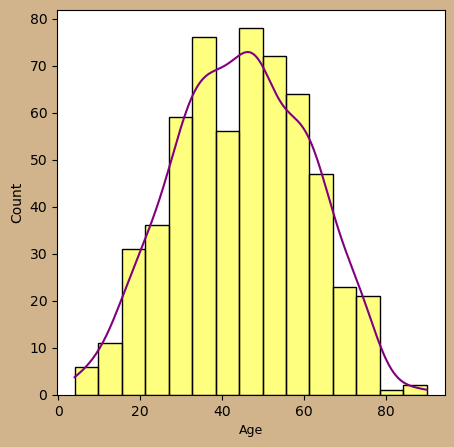

In [13]:
# Checking the distribution of Age

plt.figure(figsize=(5,5) , facecolor='tan')

ax = sns.histplot(x=df.Age , kde = True, color='yellow')
ax.lines[0].set_color('purple')
plt.xlabel('Age',fontsize=9)

Text(0.5, 0, 'Direct_Bilirubin')

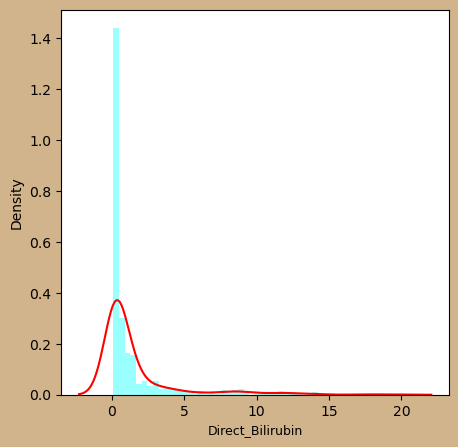

In [14]:
# Checking the distribution of Direct_Bilirubin

plt.figure(figsize=(5,5) , facecolor='tan')
ax = sns.distplot(x=df.Direct_Bilirubin , color = 'cyan')
ax.lines[0].set_color('red')
plt.xlabel('Direct_Bilirubin',fontsize=9)

Text(0.5, 0, 'Total_Bilirubin')

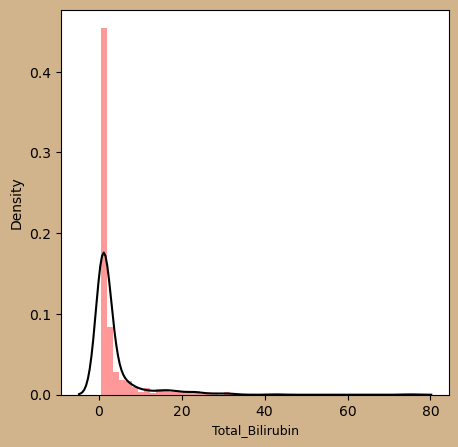

In [15]:
# Checking the distribution of Direct_Bilirubin
plt.figure(figsize=(5,5) , facecolor='tan')
ax = sns.distplot(x=df.Total_Bilirubin , color = 'red')
ax.lines[0].set_color('black')
plt.xlabel('Total_Bilirubin',fontsize=9)


Text(0.5, 0, 'Al_Aminotransferase')

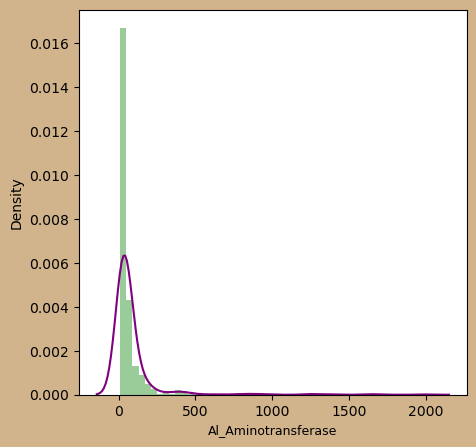

In [16]:
# Checking the distribution of Al_Aminotransferase
plt.figure(figsize=(5,5) , facecolor='tan')
ax = sns.distplot(x=df.Al_Aminotransferase,color='green')
ax.lines[0].set_color('purple')
plt.xlabel('Al_Aminotransferase',fontsize=9)


Text(0.5, 0, 'Al_Phosphotase')

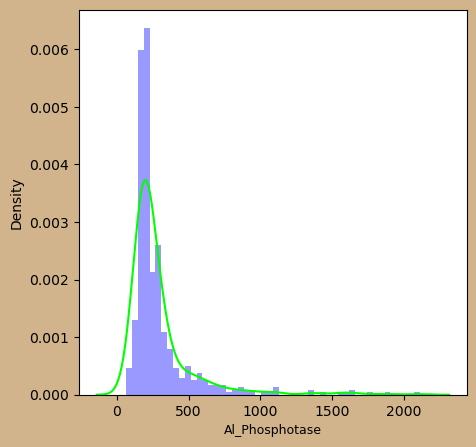

In [17]:
# Checking the distribution of Al_Phosphotase

plt.figure(figsize=(5,5) , facecolor='tan')
ax = sns.distplot(x=df.Al_Phosphotase,color='blue')
ax.lines[0].set_color('lime')
plt.xlabel('Al_Phosphotase',fontsize=9)

Text(0.5, 0, 'Asp_Aminotransferase')

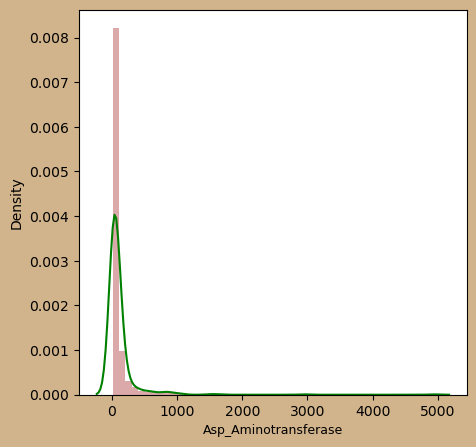

In [18]:
# Checking the distribution of Al_Phosphotase

plt.figure(figsize=(5,5) , facecolor='tan')
ax = sns.distplot(x=df.Asp_Aminotransferase,color='brown')
ax.lines[0].set_color('green')
plt.xlabel('Asp_Aminotransferase',fontsize=9)

Text(0.5, 0, 'Total_Protiens')

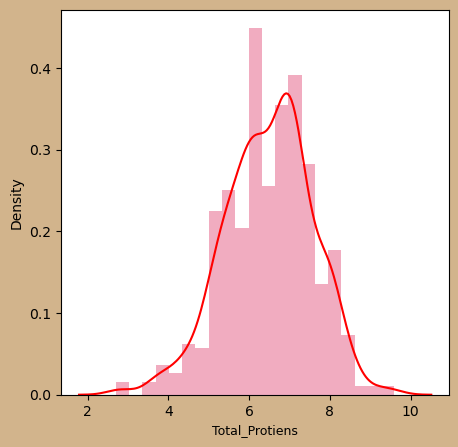

In [19]:
# Checking the distribution of Total_Protiens

plt.figure(figsize=(5,5) , facecolor='tan')
ax = sns.distplot(x=df.Total_Protiens,color='#DE3163')
ax.lines[0].set_color('red')
plt.xlabel('Total_Protiens',fontsize=9)


Text(0.5, 0, 'Albumin')

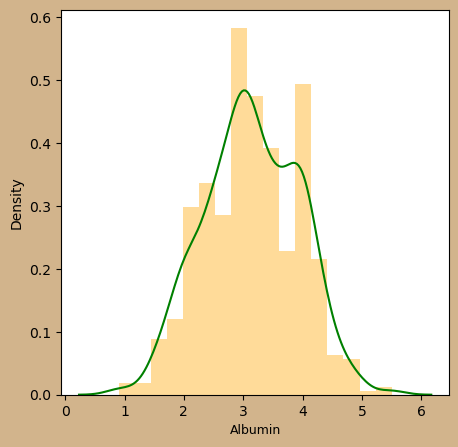

In [20]:
plt.figure(figsize=(5,5) , facecolor='tan')

ax = sns.distplot(x=df.Albumin,color='orange')
ax.lines[0].set_color('green')
plt.xlabel('Albumin',fontsize=9)

Text(0.5, 0, 'Alb_Glo_Ratio')

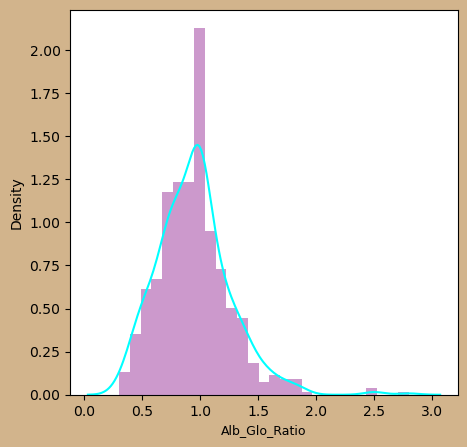

In [21]:
# Checking the distribution of Alb_Glo_Ratio

plt.figure(figsize=(5,5) , facecolor='tan')
ax = sns.distplot(x=df.Alb_Glo_Ratio,color='Purple')
ax.lines[0].set_color('Aqua')
plt.xlabel('Alb_Glo_Ratio',fontsize=9)



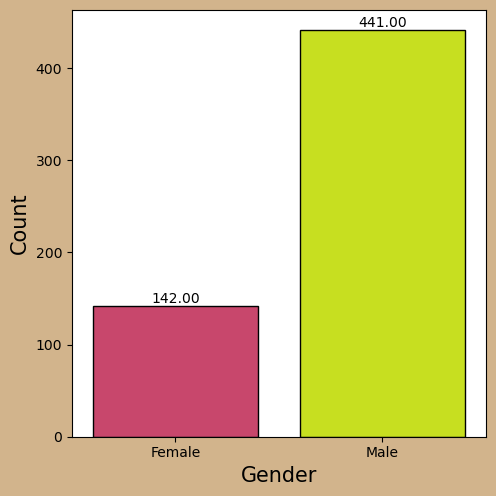

In [22]:
# Checking the distribution of Gender

plt.figure(figsize=(5,5) , facecolor='tan')
ax = sns.countplot(x='Gender', data=df , edgecolor='black' , palette=['#DE3163','#DFFF00' ])
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f')
  
plt.tight_layout()

plt.xlabel('Gender',fontsize=15)
plt.xticks(fontsize=10)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=10)
plt.show()

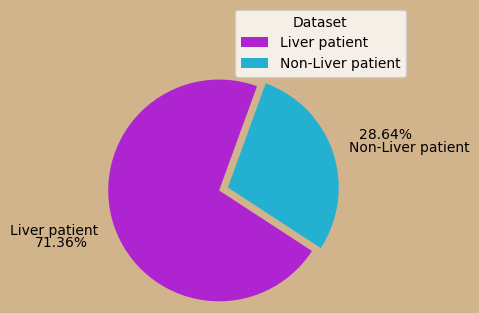

In [23]:
explode = ( 0.1, 0)  
fig = plt.figure(figsize=(4,3) , facecolor='tan')
plt.pie(df['Has_liver_disease'].value_counts(),labels=['Liver patient','Non-Liver patient'],radius=1.2,
colors = ['#ae24d1','#24b1d1'],autopct='%1.2f%%',pctdistance=1.5 ,labeldistance=1.15,explode=explode,startangle =70)

plt.legend(title = 'Dataset',loc='upper right', bbox_to_anchor=(1.3,1.3))
plt.show()

<span style="color:limegreen;font-size:20pt;font-family: Arial Black;"> <i> 6.1 Observation : </i> </span>
<span style="color:crimson;font-size:13pt;font-family:  cursive;"> <i> <br>    
    * Higher volume of people covered in this study are in the age group of 30 two 65. <br> 
    * People between age 25 to 75 are having liver disease.<br>
    * The count of male patients(76%) are more than the female patients(24%). <br>    
    * Maximum people having Alkaline Phosphotase lie in range 50 - 200. <br>
    * Maximum people having total bilirubin level lie in range from 0 - 2. <br>
    * Maximum people having direct bilirubin level lie in range from 0.2- 0.5. <br>
    * Maximum people having Total protien level lie in range from 6 - 7.<br>
    * Maximum people having Albumin level lie in range from 2.8 - 3. <br>
    * People between  25 to 75 years are prone to Liver Disease . Hence strongly recommend to do Liver function test.<br>    
    * The graphs clearly shows that there are outliers . If the outliers are more than 2% need to handle them using IQR method
      when the distribution is skewed and 3 sigma method for normally distributed features.<br>    
    * It is also very clear that the count of Liver_patient(71%) and Non_Liver_patient(29%) is not balanced , so Smote has to be applied.      <br> </i> </span>

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 6.2 Bivariate Analysis : </i> </span>

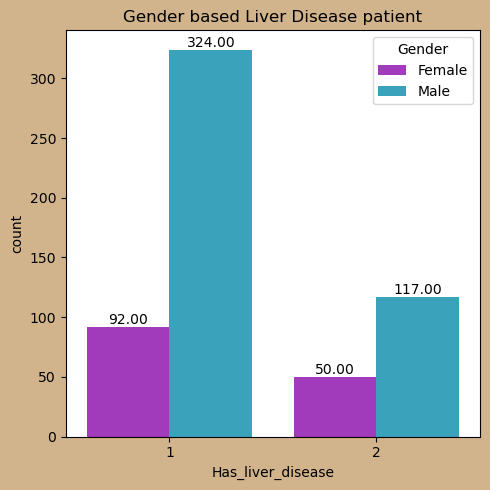

In [24]:
plt.figure(figsize=(5,5), facecolor='tan')
ax = sns.countplot(x="Has_liver_disease" , data=df , hue = 'Gender' ,palette=['#ae24d1' , '#24b1d1'] )
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f')

ax.set_title("Gender based Liver Disease patient")
plt.tight_layout()
plt.show()
   


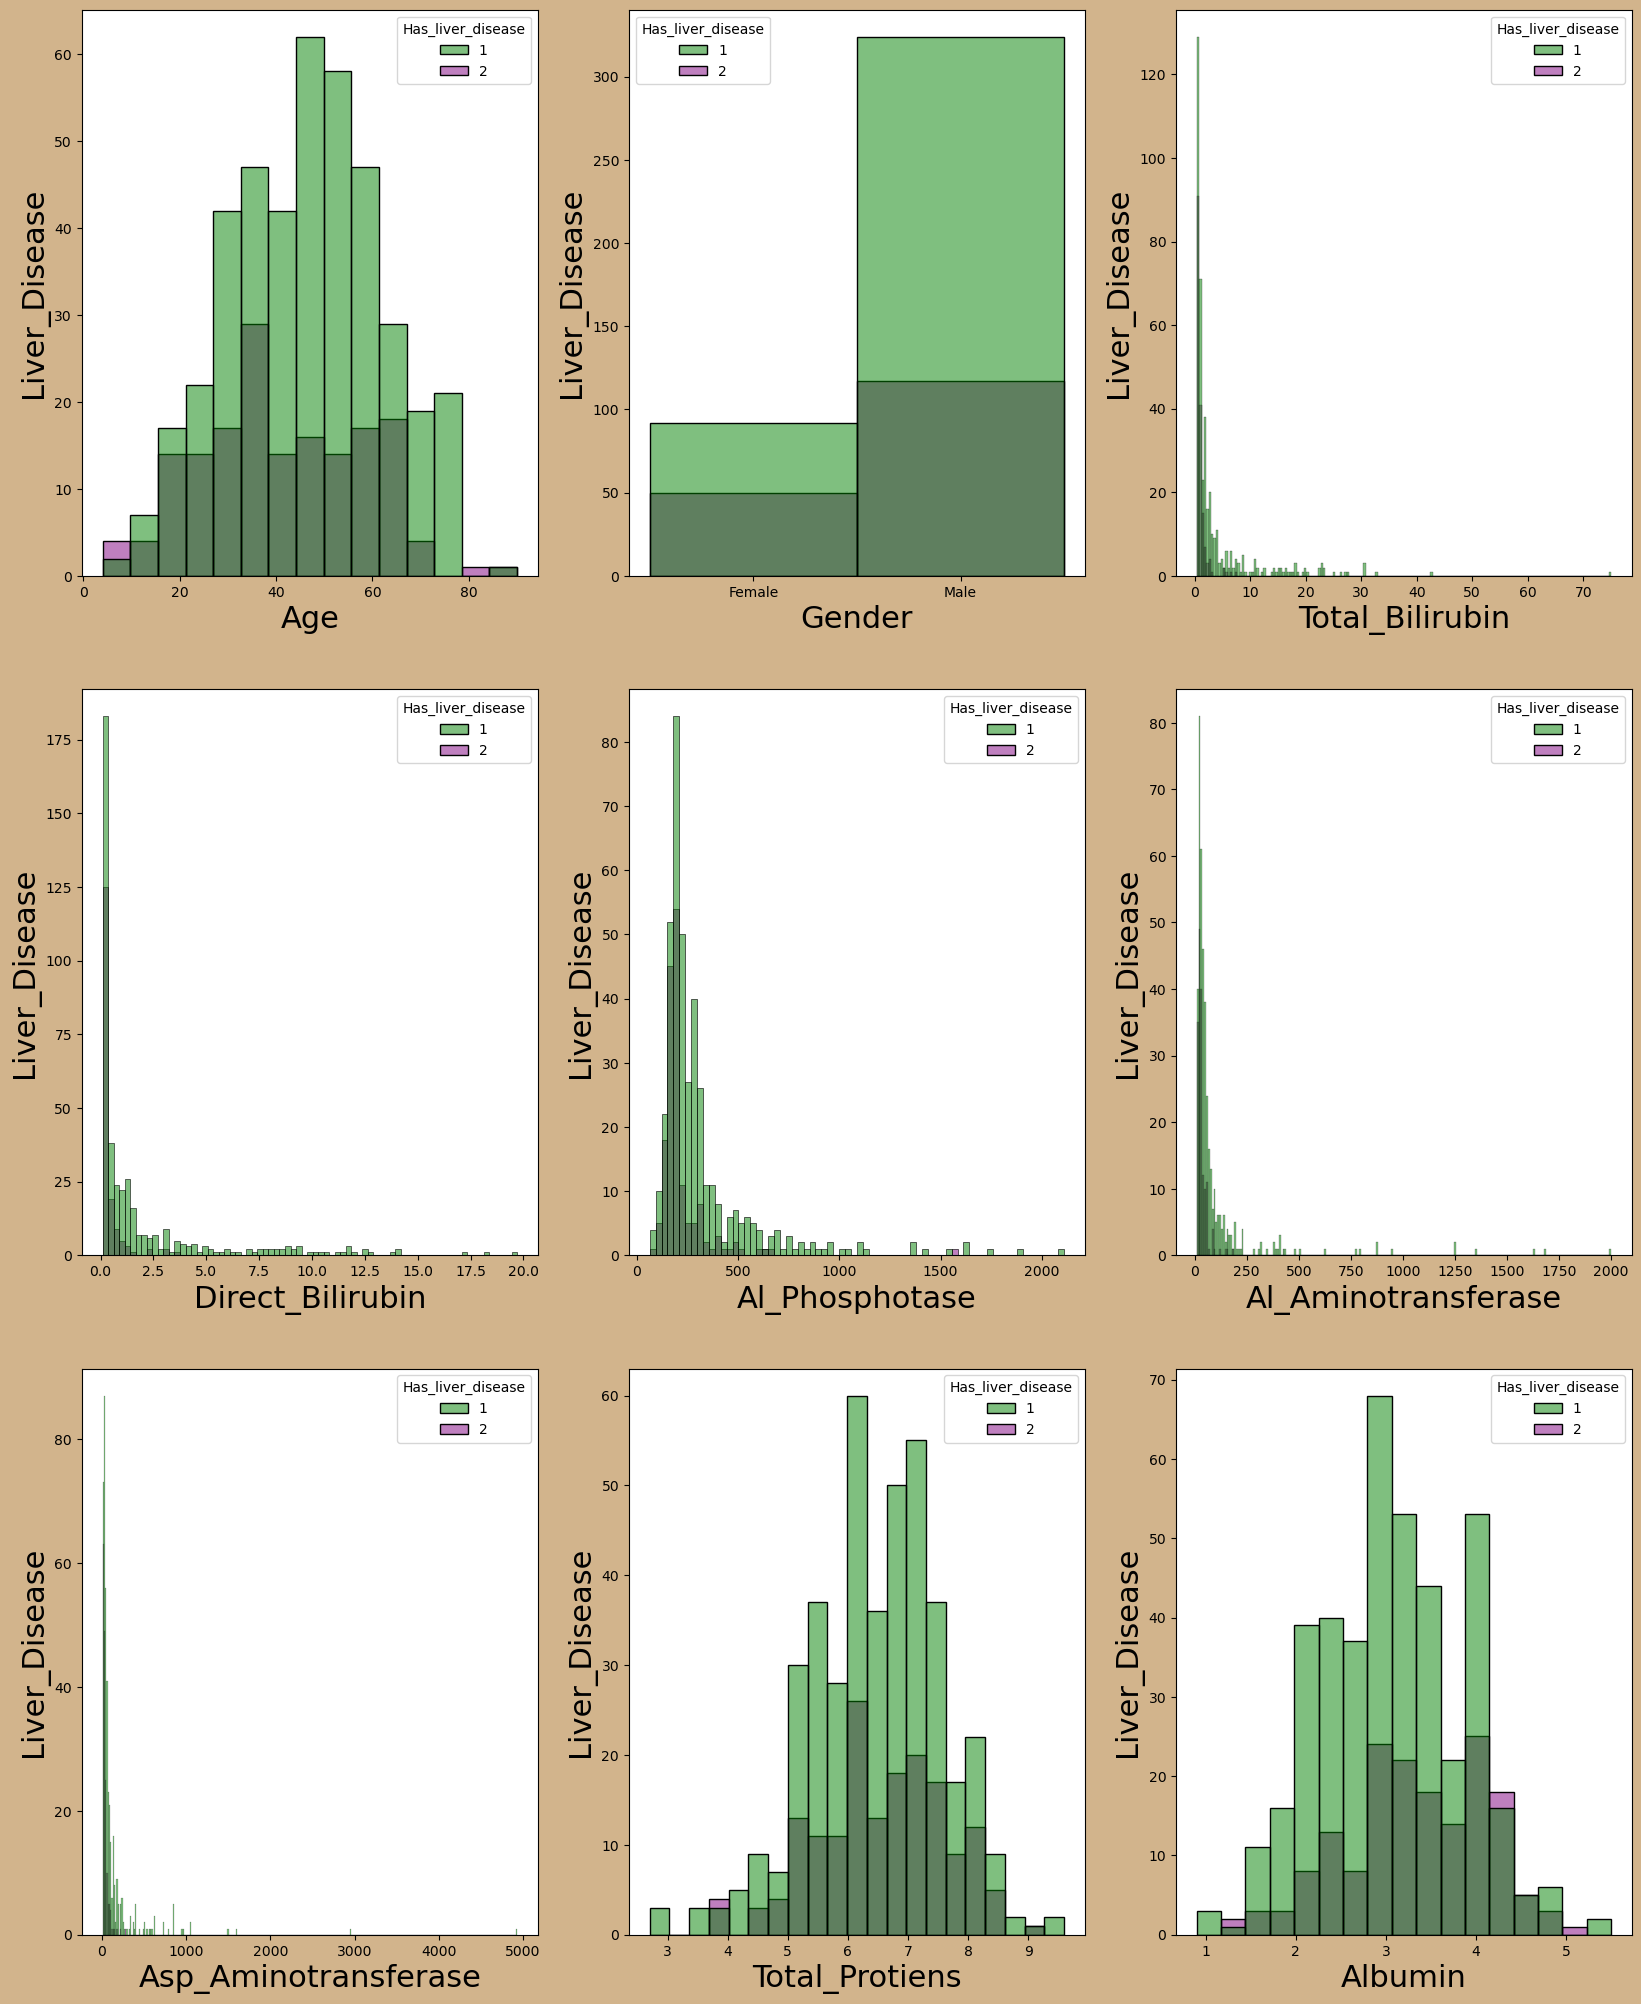

In [25]:
plt.figure(figsize=(20,25), facecolor='tan')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=df[column],hue=df.Has_liver_disease,palette=['green' , 'purple'] ) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=22) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('Liver_Disease',fontsize=22)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

# palette=['#ae24d1' , '#24b1d1']

<span style="color:limegreen;font-size:20pt;font-family: Arial Black;"> 6.2 Observations: </span>
<span style="color:crimson;font-size:13pt;font-family:  cursive;"> <i>  
    * In the data given,  71.36 % of patients are diagnosed with liver disease. In that 75% are male <br>
    * In the data given,  28.64% % of patients are<b> NOT</b> affected with liver disease.  <br>
    * People having Total bilirubin  (0 to 5) and Direct bilirubin (0.25 to 1.25) are diagnosed with liver disease.<br>
    * People having Alkaline Phosphotase(0 to 500) , Alamine Aminotransferase(upto 100) and Total Protien(5 to 8) are diagnosed
      with liver disease.<br>
    * People having Albumin (1.5 to 4) and Albumin and Globulin Ratio(less than 1) are diagnosed with liver disease.<br>
    * It is very clear from the pie chart that 71.36% patients are diagnosed with liver disease and 28.64% do NOT have liver
       disease. <br> 
    </i> </span>

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 6.3 Multivariate Analysis : </i> </span>

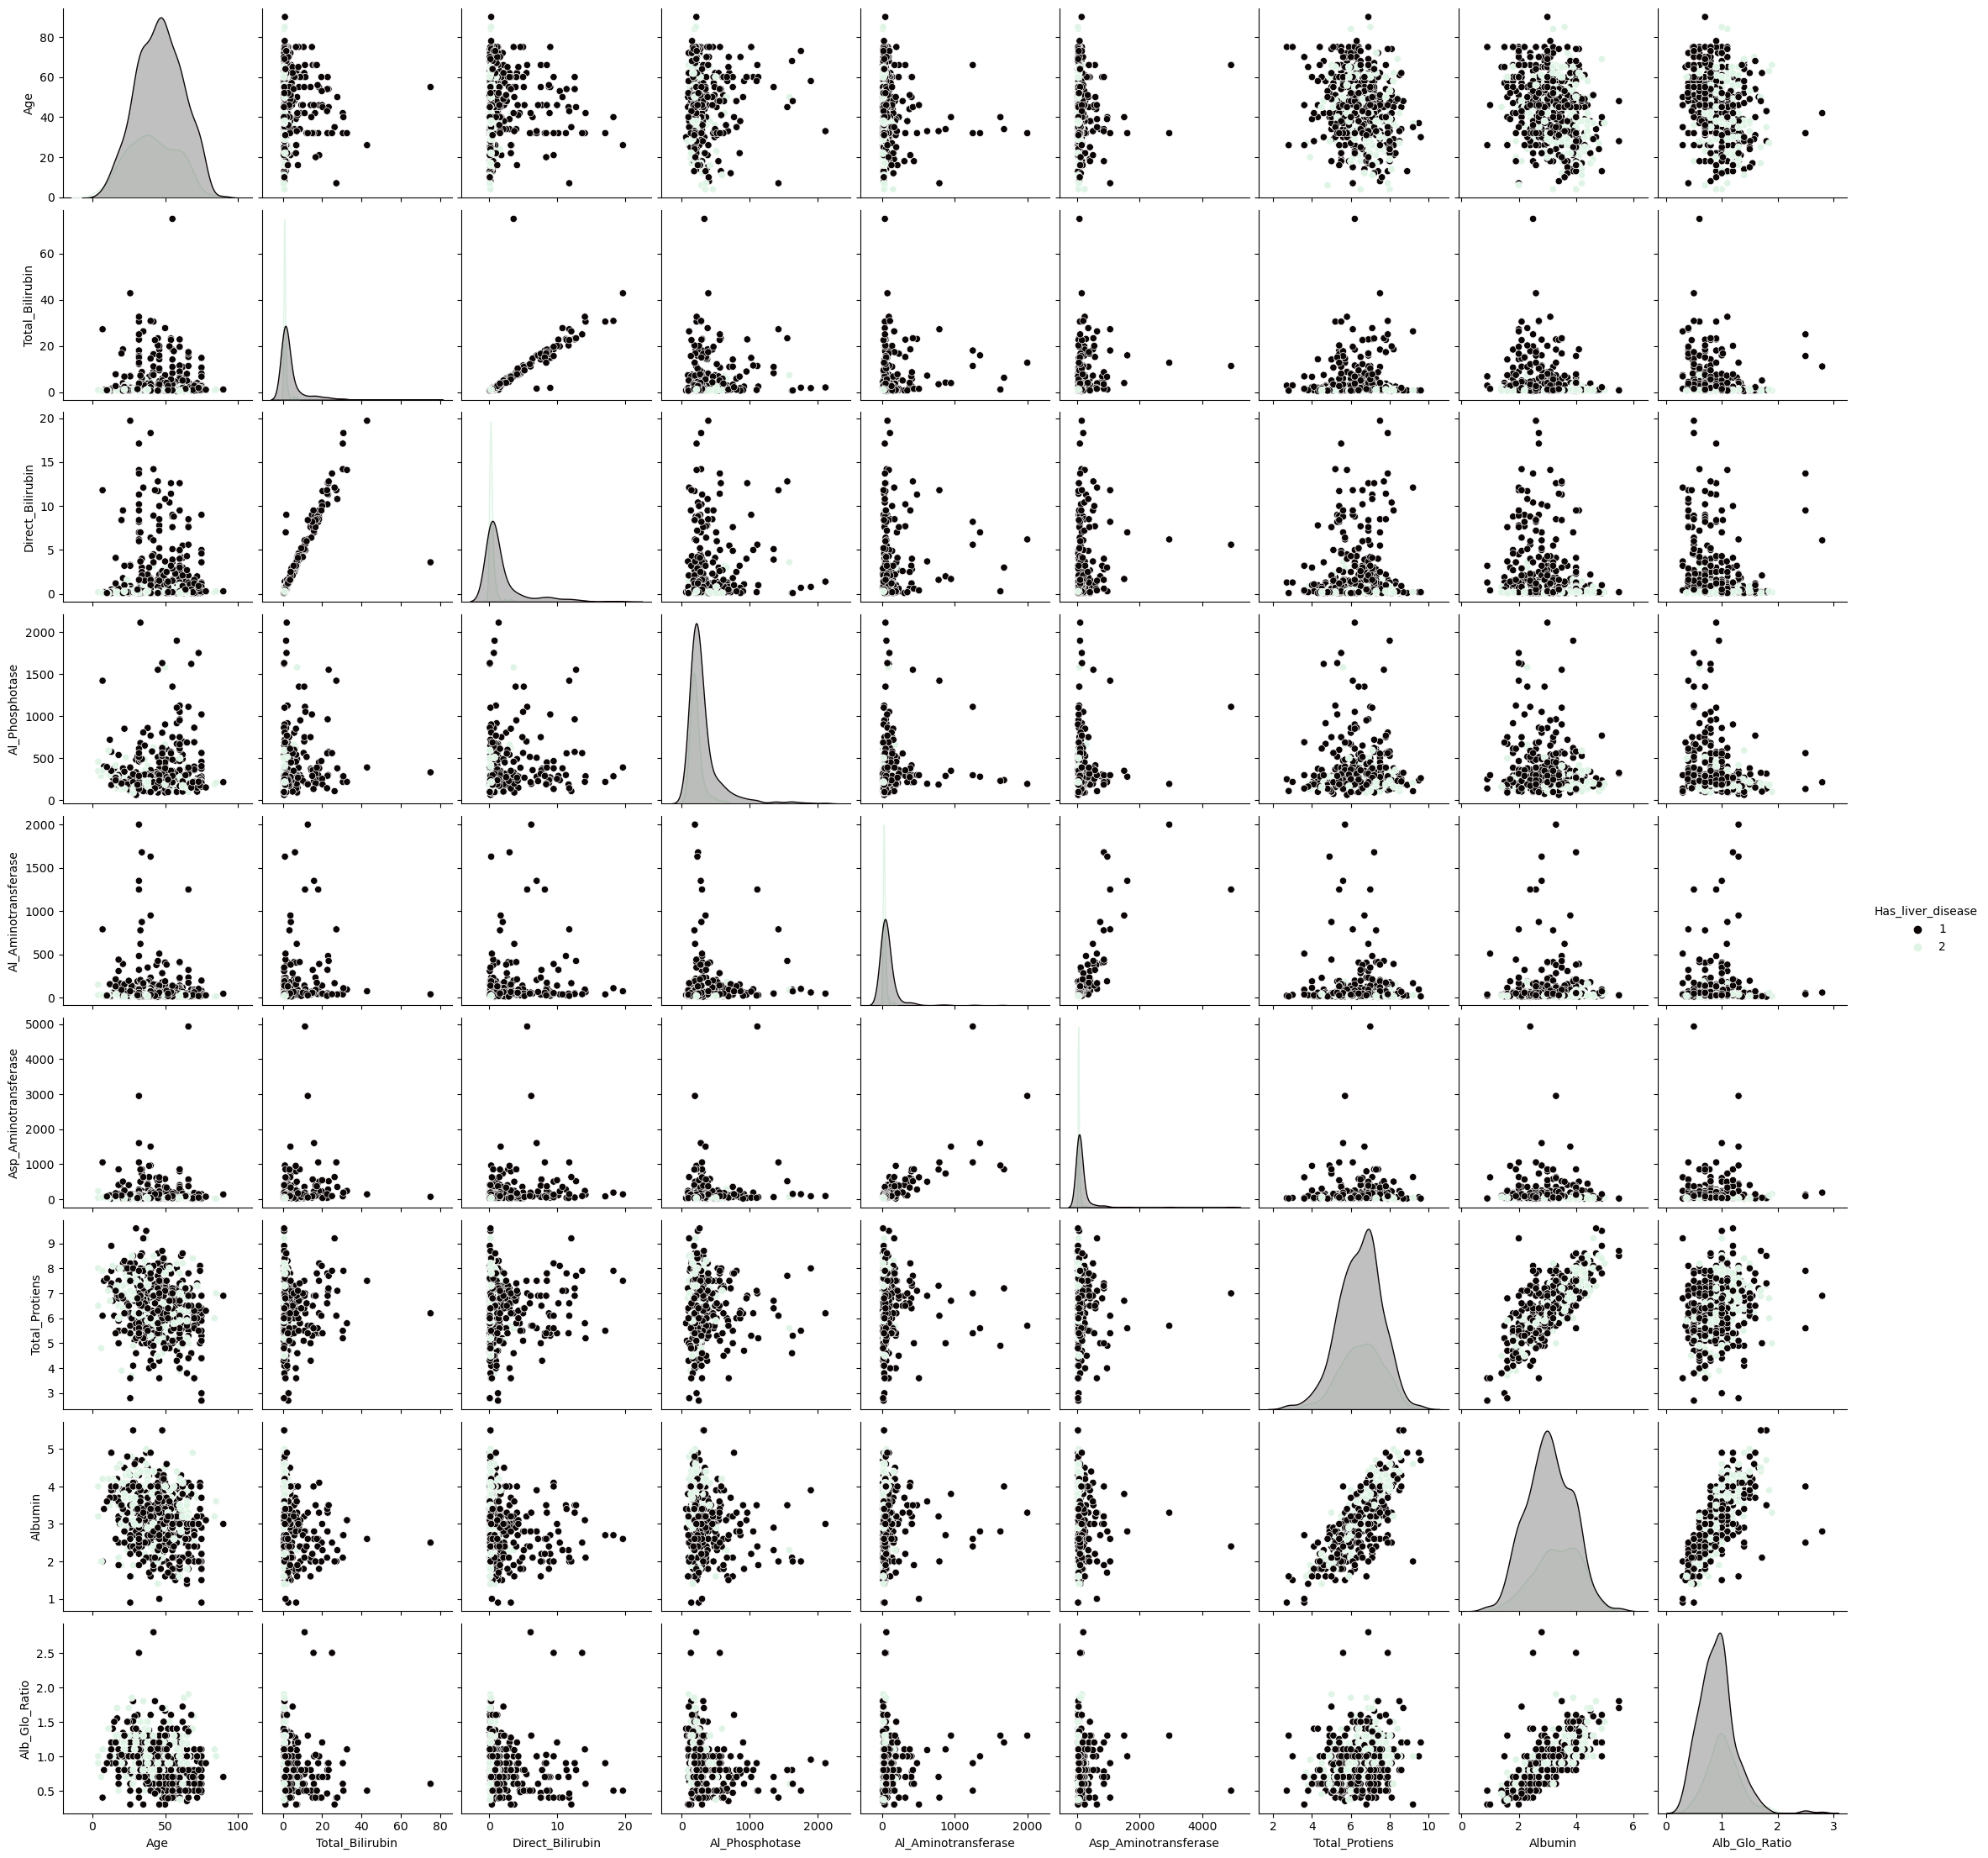

In [26]:
sns.pairplot(data=df, hue='Has_liver_disease',palette="mako")
plt.show()

<Axes: >

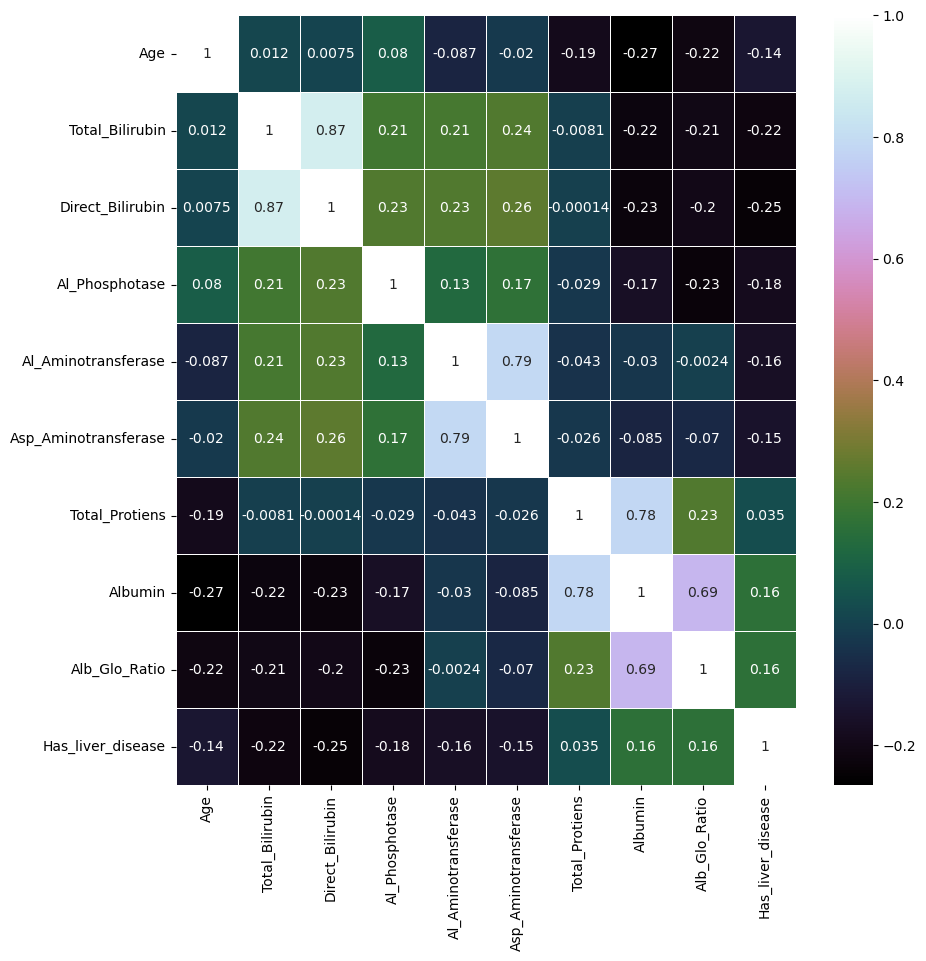

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,linewidths=.5,cmap ='cubehelix') #  cubehelix

<span style="color:limegreen;font-size:20pt;font-family: Arial Black;"> <i> 6.3 Observations: </i> </span>
<span style="color:crimson;font-size:13pt;font-family: cursive;">  <i>      
    * From the heat map , we can clearly see that, <br>
    * Direct_Bilirubin and Total_Bilirubin are highly correlated to each other. <br>
    * Al_Aminotransferase and Asp_Aminotransferase are highly correlated to each other. <br>
    * Albumin and Alb_Glo_Ratio are highly correlated to each other. <br>
    * Choosing 'Total_Bilirubin' and 'Asp_Aminotransferase' to drop from the input features since both are having high
         correlation values . Droping those two columns can improve the accuracy of the models.<br>
     </i> <span>

<span style="color:blue;font-size:25pt">7. Data Preprocessing </span>

<span style="color:black;font-size:15pt;font-family: Arial " > <i> Data cleaning process -    Fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies. </i> </span>

<span style="color:mediumvioletred ;font-size:17pt;font-family: Arial Black;" > <i> 7.1 Missing value :  </i> </span>

## <i> 7.1.1 Checking for Missing value  & handling Missing value </i>

In [28]:
df.isnull().sum()

Age                     0
Gender                  0
Total_Bilirubin         0
Direct_Bilirubin        0
Al_Phosphotase          0
Al_Aminotransferase     0
Asp_Aminotransferase    0
Total_Protiens          0
Albumin                 0
Alb_Glo_Ratio           4
Has_liver_disease       0
dtype: int64

## <i> 7.1.2 Alb_Glo_Ratio has 4 missing values. We need to handle the missing values. </i>

In [29]:
# Insight : Replacing the null values in Alb_Glo_Ratio column with median since the distribution is slightly skewed. 
#           It is always very safe to replace null values with median when the data is slightly skewed.

df.loc[df['Alb_Glo_Ratio'].isnull() == True , 'Alb_Glo_Ratio'] = np.median(df.Alb_Glo_Ratio.dropna(axis=0)) 

In [30]:
# Rechecking if the null values are replaced.
df.isnull().sum()

Age                     0
Gender                  0
Total_Bilirubin         0
Direct_Bilirubin        0
Al_Phosphotase          0
Al_Aminotransferase     0
Asp_Aminotransferase    0
Total_Protiens          0
Albumin                 0
Alb_Glo_Ratio           0
Has_liver_disease       0
dtype: int64

###  <i> We have handled the missing values in Alb_Glo_Ratio column. </i>

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 7.2 ENCODING:  </i> </span>

## <i> 7.2.1 ENCODING: one hot Encoding for the gender column. </i>
    

In [31]:
data = pd.get_dummies(df['Gender'] , prefix = 'Gender' ,drop_first=True)
df = pd.concat([df,data] , axis=1).drop(['Gender'] , axis=1)

## <i> 7.2.2 ENCODING: Manual Encoding for the Has_liver_disease column. </i>

In [32]:
df['Has_liver_disease']=df['Has_liver_disease'].map({1:1,2:0})


In [33]:
# Checking the changes after the encoding is done . 
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Al_Phosphotase,Al_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,Alb_Glo_Ratio,Has_liver_disease,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [34]:
# Checking the feature values before applying scalling.

df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Al_Phosphotase,Al_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,Alb_Glo_Ratio,Has_liver_disease,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,0.713551,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,1.000000


<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 7.3 MinMaxScaler:  </i> </span>

In [35]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df[['Age' , 'Total_Bilirubin', 'Direct_Bilirubin', 'Al_Phosphotase',
       'Al_Aminotransferase', 'Asp_Aminotransferase', 'Total_Protiens',
       'Albumin', 'Alb_Glo_Ratio']] = scale.fit_transform(df[['Age' , 'Total_Bilirubin', 'Direct_Bilirubin', 'Al_Phosphotase',
                                                                'Al_Aminotransferase', 'Asp_Aminotransferase', 'Total_Protiens',
                                                                'Albumin', 'Alb_Glo_Ratio']])

In [36]:
# Checking if the feature values have been scalled down.
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Al_Phosphotase,Al_Aminotransferase,Asp_Aminotransferase,Total_Protiens,Albumin,Alb_Glo_Ratio,Has_liver_disease,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.473792,0.038858,0.070720,0.111176,0.035534,0.020311,0.548288,0.487359,0.258779,0.713551,0.756432
std,0.188254,0.083238,0.143291,0.118680,0.091769,0.058735,0.157312,0.172939,0.127398,0.452490,0.429603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337209,0.005362,0.005102,0.054958,0.006533,0.003049,0.449275,0.369565,0.160000,0.000000,1.000000
50%,0.476744,0.008043,0.010204,0.070835,0.012563,0.006505,0.565217,0.478261,0.252000,1.000000,1.000000
75%,0.627907,0.029491,0.061224,0.114802,0.025377,0.015654,0.652174,0.630435,0.320000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 7.4 X , y Variables </i></span

In [37]:
X=df.drop('Has_liver_disease',axis=1)
y=df.Has_liver_disease

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 7.5 Feature Selection </i></span>

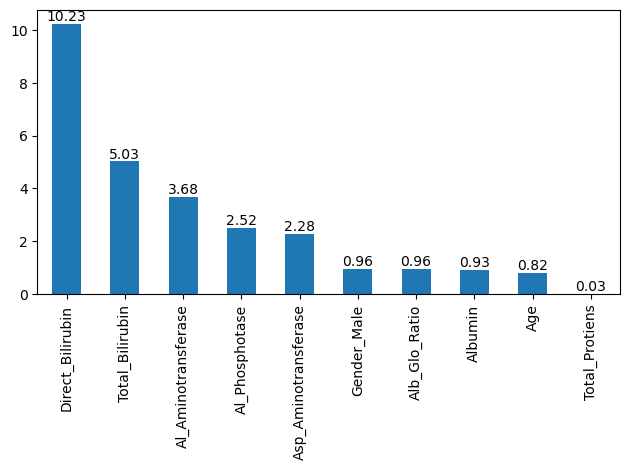

In [38]:
chi_scores = chi2(X,y)

chi_scores

# Higher the chi value , higher the importance

chi_values = pd.Series(chi_scores[0] , index = X.columns)
chi_values.sort_values(ascending = False , inplace = True)
ax = chi_values.plot.bar()
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f')
   # ax.bar_label(bars , label_type='center')
plt.tight_layout()
plt.show()

In [39]:
np.random.seed(20)

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 7.6 Dropping the highly correlated features. </i><span> </i>

In [40]:

X = df.loc[ : ,['Age', 'Direct_Bilirubin', 'Al_Phosphotase',
           'Al_Aminotransferase', 'Albumin','Alb_Glo_Ratio', 'Gender_Male']]

y=df.Has_liver_disease

In [41]:
X.shape

(583, 7)

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 7.7 TRAIN TEST SPLIT </i> <span>

In [42]:
# Since it is a small dataset , for testing, we choose to split our data to 80% train and 20% for test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 7.8 SMOTE :  </i> </span>

In [43]:
#SMOTE 
#!pip install imblearn
from collections import Counter# importing counter to check count of each label
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation

X_smote , y_smote = sm.fit_resample(X_train,y_train)

y_smote.value_counts()
y_train.value_counts()

from collections import Counter
print("Actual Classes",Counter(y_train)) # checking count for each class 
print("SMOTE Classes",Counter(y_smote)) # checking count for each class 

Actual Classes Counter({1: 333, 0: 133})
SMOTE Classes Counter({0: 333, 1: 333})


## <i> We can see that the classes in the target variable is balanced after aplying SMOTE.</i>

<span style="color:blue;font-size:25pt">8.  Model building </span>

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 8.1 Model Building - Without Hyperparameter </i> </span>

##  Common function that will print all the scores for each model.

In [44]:
def Evaluate(model, Y_Test, y_smote, y_Pred_test,y_Pred_train) :
    
    model_name = model
    
    train_Accuracy = accuracy_score(y_smote, y_Pred_train)
        
    test_Accuracy = accuracy_score(Y_Test, y_Pred_test)     
    
    Precision = precision_score(Y_Test, y_Pred_test)
    
    Recall = recall_score(Y_Test, y_Pred_test)
    
    F1 = f1_score(Y_Test, y_Pred_test)
         
        
    Metric = {'Train Acc_Score' : round(train_Accuracy,2), 
        
              'Test Acc_Score' : round(test_Accuracy,2), 
              
              'Precision_Score' : round(Precision,2),
              
              'Recall_Score' : round(Recall,2),
              
              'F1_Score' : round(F1,2)}
    
        
    print( "  \n   ")
    
    print('*'*90)
    
    print("                                      " , model_name)
    
    print('*'*90)
    
    print(f'TRAIN Acc Score : {train_Accuracy * 100:.2f}%')
    
    print(f'TEST Acc Score : {test_Accuracy * 100:.2f}%')
    
    print( "  \n   ")
    
    print(f'Precision Score : {Precision * 100:.2f}%')
    
    print(f'Recall Score : {Recall * 100:.2f}%')
    
    print(f'F1 Score : {F1 * 100:.2f}%')
    
    print( "  \n   ") 
    
    print('*'*90)
    
    print(classification_report(Y_Test, y_Pred_test))
    
    print('*'*90)
     
    return Metric

## Common code to print the Confusion matrix for all the models.  

In [45]:
def Classification_classes(model, Y_Test, y_Pred_test) :
    model_name = model
    
    conf_matrix = confusion_matrix(Y_Test, y_Pred_test)
    
    tn,fp, fn, tp = conf_matrix.ravel()
    
    classes = {'True Positive (TP) : ' : tp , 
                'True Negative (TN) : ' : tn ,
                'False Positive (FP) : ' : fp ,
                'False Negative (FN) : ' : fn }
    
    print( "  \n   ") 
    
    #Print the true positive, true negative, false positive, and false negative values
    print("True Positive (TP): ",tp)
    print("True Negative (TN): ",tn)
    print("False Positive (FP): ",fp)
    print("False Negative (FN): ",fn)
    
    print( "  \n   ")
    
    return classes

## Common code to print the ROC Curve for all the models.

In [46]:
def AUC_ROC(model, Y_Test, y_Pred_test) :
    model_name = model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_Test, y_Pred_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    AUC_ROC = {'roc_auc' : roc_auc}
    print('*'*90)
    print("roc_auc: ",roc_auc)
    return AUC_ROC

# 1. Logistic Regression : Without Hyperparameter Tuning.

In [47]:
LR_B_model = LogisticRegression()

LR_B_model.fit(X_smote, y_smote)

ypred = LR_B_model.predict(X_test)

y_train_pred = LR_B_model.predict(X_smote)

LR_B_model_Metric = Evaluate('Logistic_Regression',y_test, y_smote, ypred,y_train_pred)

LR_B_model_Classes = Classification_classes('Logistic_Regression',y_test, ypred)


  
   
******************************************************************************************
                                       Logistic_Regression
******************************************************************************************
TRAIN Acc Score : 70.27%
TEST Acc Score : 63.25%
  
   
Precision Score : 81.25%
Recall Score : 62.65%
F1 Score : 70.75%
  
   
******************************************************************************************
              precision    recall  f1-score   support

           0       0.42      0.65      0.51        34
           1       0.81      0.63      0.71        83

    accuracy                           0.63       117
   macro avg       0.61      0.64      0.61       117
weighted avg       0.70      0.63      0.65       117

******************************************************************************************
  
   
True Positive (TP):  52
True Negative (TN):  22
False Positive (FP):  12
False Negative (FN):  31
  
   


# 2. SVM : Without Hyperparameter Tuning.

In [48]:
SVC_B_model = SVC()

SVC_B_model.fit(X_smote, y_smote)

ypred = SVC_B_model.predict(X_test)

y_train_pred = SVC_B_model.predict(X_smote)

SVC_B_model_Metric = Evaluate('SVC',y_test, y_smote, ypred,y_train_pred)

SVC_B_model_Classes = Classification_classes('SVC',y_test, ypred)

  
   
******************************************************************************************
                                       SVC
******************************************************************************************
TRAIN Acc Score : 72.67%
TEST Acc Score : 59.83%
  
   
Precision Score : 89.13%
Recall Score : 49.40%
F1 Score : 63.57%
  
   
******************************************************************************************
              precision    recall  f1-score   support

           0       0.41      0.85      0.55        34
           1       0.89      0.49      0.64        83

    accuracy                           0.60       117
   macro avg       0.65      0.67      0.59       117
weighted avg       0.75      0.60      0.61       117

******************************************************************************************
  
   
True Positive (TP):  41
True Negative (TN):  29
False Positive (FP):  5
False Negative (FN):  42
  
   


# 3. RandomForest _Classifier  : Without Hyperparameter Tuning.

In [49]:
RFC_B_model = RandomForestClassifier()

RFC_B_model.fit(X_smote, y_smote)

ypred = RFC_B_model.predict(X_test)

y_train_pred = RFC_B_model.predict(X_smote)

RFC_B_model_Metric = Evaluate('RandomForest_Classifier',y_test, y_smote, ypred,y_train_pred)

RFC_B_model_Classes = Classification_classes('RandomForest_Classifier',y_test, ypred)

  
   
******************************************************************************************
                                       RandomForest_Classifier
******************************************************************************************
TRAIN Acc Score : 100.00%
TEST Acc Score : 66.67%
  
   
Precision Score : 78.95%
Recall Score : 72.29%
F1 Score : 75.47%
  
   
******************************************************************************************
              precision    recall  f1-score   support

           0       0.44      0.53      0.48        34
           1       0.79      0.72      0.75        83

    accuracy                           0.67       117
   macro avg       0.61      0.63      0.62       117
weighted avg       0.69      0.67      0.67       117

******************************************************************************************
  
   
True Positive (TP):  60
True Negative (TN):  18
False Positive (FP):  16
False Negative (FN):  23
  
  

# 4. XGBoost_Classifier : Without Hyperparameter Tuning.

In [50]:
XGBoost_B_model = XGBClassifier()

XGBoost_B_model.fit(X_smote, y_smote)

ypred = XGBoost_B_model.predict(X_test)

y_train_pred = XGBoost_B_model.predict(X_smote)

XGBoost_B_model_Metric = Evaluate('XGBoost_Classifier',y_test, y_smote, ypred,y_train_pred)

XGBoost_B_model_Classes = Classification_classes('XGBoost_Classifier',y_test, ypred)

  
   
******************************************************************************************
                                       XGBoost_Classifier
******************************************************************************************
TRAIN Acc Score : 100.00%
TEST Acc Score : 68.38%
  
   
Precision Score : 81.08%
Recall Score : 72.29%
F1 Score : 76.43%
  
   
******************************************************************************************
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        34
           1       0.81      0.72      0.76        83

    accuracy                           0.68       117
   macro avg       0.64      0.66      0.64       117
weighted avg       0.71      0.68      0.69       117

******************************************************************************************
  
   
True Positive (TP):  60
True Negative (TN):  20
False Positive (FP):  14
False Negative (FN):  23
  
   


# 5.GradientBoosting_Classifier : Without Hyperparameter Tuning.

In [51]:
GradientBoosting_B_model = GradientBoostingClassifier()

GradientBoosting_B_model.fit(X_smote, y_smote)

ypred = GradientBoosting_B_model.predict(X_test)

y_train_pred = GradientBoosting_B_model.predict(X_smote)

GradientBoosting_B_model_Metric = Evaluate('GradientBoosting_Classifier',y_test, y_smote, ypred,y_train_pred)

GradientBoosting_B_model_Classes = Classification_classes('GradientBoosting_Classifier',y_test, ypred)

  
   
******************************************************************************************
                                       GradientBoosting_Classifier
******************************************************************************************
TRAIN Acc Score : 92.19%
TEST Acc Score : 68.38%
  
   
Precision Score : 82.86%
Recall Score : 69.88%
F1 Score : 75.82%
  
   
******************************************************************************************
              precision    recall  f1-score   support

           0       0.47      0.65      0.54        34
           1       0.83      0.70      0.76        83

    accuracy                           0.68       117
   macro avg       0.65      0.67      0.65       117
weighted avg       0.72      0.68      0.70       117

******************************************************************************************
  
   
True Positive (TP):  58
True Negative (TN):  22
False Positive (FP):  12
False Negative (FN):  25
  

# 6. ANN_MLPClassifier : Without Hyperparameter Tuning.

In [52]:
ANN_B_model = MLPClassifier()

ANN_B_model.fit(X_smote, y_smote)

ypred = ANN_B_model.predict(X_test)

y_train_pred = ANN_B_model.predict(X_smote)

ANN_B_model_Metric = Evaluate('ANN_MLPClassifier',y_test, y_smote, ypred,y_train_pred)

ANN_B_model_Classes = Classification_classes('ANN_MLPClassifier',y_test, ypred)

  
   
******************************************************************************************
                                       ANN_MLPClassifier
******************************************************************************************
TRAIN Acc Score : 72.82%
TEST Acc Score : 66.67%
  
   
Precision Score : 86.67%
Recall Score : 62.65%
F1 Score : 72.73%
  
   
******************************************************************************************
              precision    recall  f1-score   support

           0       0.46      0.76      0.57        34
           1       0.87      0.63      0.73        83

    accuracy                           0.67       117
   macro avg       0.66      0.70      0.65       117
weighted avg       0.75      0.67      0.68       117

******************************************************************************************
  
   
True Positive (TP):  52
True Negative (TN):  26
False Positive (FP):  8
False Negative (FN):  31
  
   


# 7. BernoulliNaiveBayes  : Without Hyperparameter Tuning.

In [53]:
#GaussianNB_B_model = GaussianNB()

GaussianNB_B_model = BernoulliNB()

GaussianNB_B_model.fit(X_smote, y_smote)

ypred = GaussianNB_B_model.predict(X_test)

y_train_pred = GaussianNB_B_model.predict(X_smote)

GaussianNB_B_model_Metric = Evaluate('NaiveBayes_Classifier',y_test, y_smote, ypred,y_train_pred)

GaussianNB_B_model_Classes = Classification_classes('NaiveBayes_Classifier',y_test, ypred)

  
   
******************************************************************************************
                                       NaiveBayes_Classifier
******************************************************************************************
TRAIN Acc Score : 55.11%
TEST Acc Score : 67.52%
  
   
Precision Score : 74.19%
Recall Score : 83.13%
F1 Score : 78.41%
  
   
******************************************************************************************
              precision    recall  f1-score   support

           0       0.42      0.29      0.34        34
           1       0.74      0.83      0.78        83

    accuracy                           0.68       117
   macro avg       0.58      0.56      0.56       117
weighted avg       0.65      0.68      0.66       117

******************************************************************************************
  
   
True Positive (TP):  69
True Negative (TN):  10
False Positive (FP):  24
False Negative (FN):  14
  
   


## Let's Compare Different Model Classes :(Before Hyprameter Tuning)

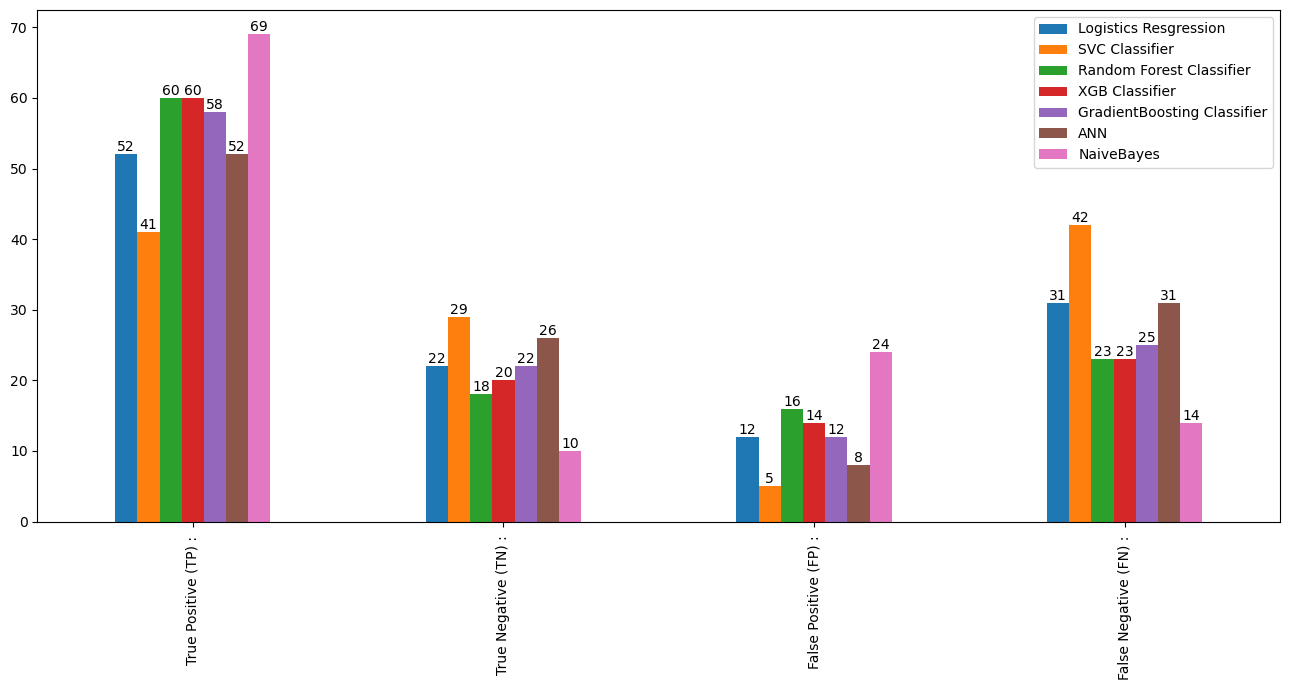

In [54]:
Classes = pd.DataFrame({'Logistics Resgression' : LR_B_model_Classes,
                        'SVC Classifier ' : SVC_B_model_Classes,
                        'Random Forest Classifier ' : RFC_B_model_Classes,
                        'XGB Classifier' : XGBoost_B_model_Classes,
                        'GradientBoosting Classifier' : GradientBoosting_B_model_Classes,
                        'ANN' : ANN_B_model_Classes,
                        'NaiveBayes' : GaussianNB_B_model_Classes})


ax = Classes.plot.bar(figsize=(13,7));
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

## Let's Compare Different Model Metric : (Before Hyprameter Tuning)

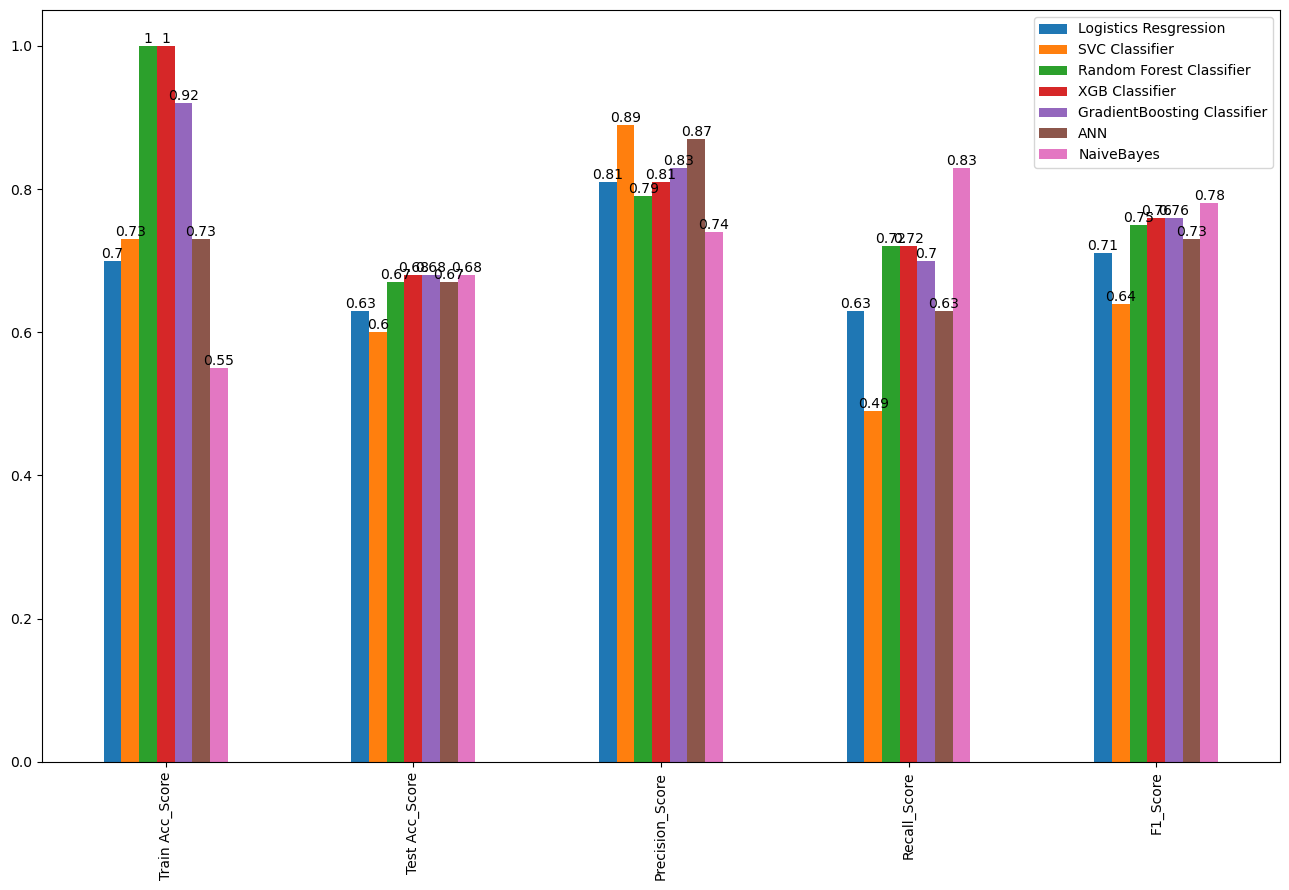

In [55]:
Metric = pd.DataFrame({'Logistics Resgression' : LR_B_model_Metric,
                        'SVC Classifier ' : SVC_B_model_Metric,
                        'Random Forest Classifier ' : RFC_B_model_Metric,
                        'XGB Classifier' : XGBoost_B_model_Metric,
                        'GradientBoosting Classifier' : GradientBoosting_B_model_Metric,
                        'ANN' : ANN_B_model_Metric,
                        'NaiveBayes' : GaussianNB_B_model_Metric})


ax = Metric.plot.bar(figsize=(13,9));
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()


<span style="color:limegreen;font-size:20pt;font-family: Arial Black;"> <i> 8.1  Insights :</i>  </span>
* Random forest and Xgboost is showing overfitting.<br>
* SVM is giving highest False Negative count  and lowest False Positive count.
* The Train Acurracy is lesser than the Test Accuracy in NaiveBayes algorithm.But it gives the least False Negative count and highest False Positive count.Also highest recall score and highest F1 score.

<span style="color:mediumvioletred ;font-size:15pt;font-family: Arial Black;" > <i> 8.2  Model Building - With Hyperparameter Tunning </i></span> 

# 1. SVM : With Hyperparameter Tuning.

In [56]:
# defining parameter range
SVC_params = {'C': [ 1,2,4,5],
              'gamma': [0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(5, 13)))}
model=SVC()
SVC_GSCV = GridSearchCV(model, SVC_params, refit = True, verbose = 2,scoring='f1',cv=3)


SVC_GSCV.fit(X_smote, y_smote)


print( "  \n   ")

print('*'*90)

SVM_best_estimator = SVC_GSCV.best_estimator_

SVM_best_params = SVC_GSCV.best_params_##it will give you best parameters 

print(f"SVM Best paramters: {SVM_best_params})")##printing  best parameters

print(f"SVM Best estimator: {SVM_best_estimator})")##printing  best parameters

#########################################################################################


SVM_best_estimator.fit(X_smote, y_smote)

SVC_y_pred=SVM_best_estimator.predict(X_test)#testing

SVC_y_train_pred = SVM_best_estimator.predict(X_smote)

SVC_GSCV_Model_Metric = Evaluate('SVC',y_test, y_smote, SVC_y_pred,SVC_y_train_pred)

SVC_GSCV_Model_Classes = Classification_classes('SVC',y_test, SVC_y_pred)

SVC_GSCV_Model_AUC_ROC = AUC_ROC('SVC',y_test, SVC_y_pred)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] END .....................C=1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=8; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=8; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, 

[CV] END .....................C=2, gamma=0.1, random_state=7; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, random_state=7; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, random_state=8; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, random_state=8; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, random_state=8; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=2, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=2, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=2, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=2, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=2, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END .....................C=4, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=4, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=4, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=4, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=4, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=4, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=4, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=4, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=4, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=4, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=4, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=4, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................

# 2. RandomForest _Classifier : With Hyperparameter Tuning.

In [57]:
RF_Parameters = {'n_estimators' : [50 , 75 , 100 , 150],
              'max_depth' : [2 , 4 , 5],
              'max_features' : ['sqrt', 'log2'],
              'min_samples_split' : [3, 4, 5, 6 , 7],
              'min_samples_leaf' : [ 2, 3]}

RFC = RandomForestClassifier(n_jobs=2)

RF_RSCV = RandomizedSearchCV(estimator= RFC, # Model 
                          param_distributions=RF_Parameters, # Parameters of the Model
                          scoring='f1',
                          n_iter=5,    # Number of Iterations to Perform
                          cv = 3,       # 3 Fold Cross Validation
                          verbose = 2)  


RF_RSCV.fit(X_smote, y_smote)


print( "  \n   ")

print('*'*90)

RF_best_estimator = RF_RSCV.best_estimator_

RF_best_params = RF_RSCV.best_params_##it will give you best parameters 

print(f"RF Best paramters: {RF_best_params})")##printing  best parameters

print(f"RF Best estimator: {RF_best_estimator})")##printing  best estimator


#########################################################################################



RF_best_estimator.fit(X_smote, y_smote)

RF_RSCV_y_Pred = RF_best_estimator.predict(X_test)

RF_RSCV_y_Pred_train = RF_best_estimator.predict(X_smote)

RF_RSCV_Model_Metric = Evaluate('Random_Forest_Classifier',y_test, y_smote, RF_RSCV_y_Pred,RF_RSCV_y_Pred_train)

RF_RSCV_Model_Classes = Classification_classes('Random_Forest_Classifier',y_test, RF_RSCV_y_Pred)

RF_RSCV_Model_AUC_ROC = AUC_ROC('Random_Forest_Classifier',y_test, RF_RSCV_y_Pred)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   1.3s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=75; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=  

# 3. XGBoost_Classifier : With Hyperparameter Tuning.

In [58]:
XGB_param = {'gamma': [0.0001,0.01],
              'learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.4],
              'max_depth': [5],
              'n_estimators': [110,120],
              'subsample': [0.1,0.2,0.4,0.8,1.6],
              'colsample_bytree': [0.0001,0.09], # Changing this , affects only the accuracy score.
              'min_child_weight' :[1],                          
              'scale_pos_weight' : [1,20]}

XGB=XGBClassifier(random_state=15,verbosity=0,silent=0)
XGB_RSCV = RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=XGB_param, n_iter=50, cv=2, 
                               verbose=2, random_state=10, n_jobs=-1)

XGB_RSCV.fit(X_smote, y_smote)##training data on randomsearch cv


print( "  \n   ")

print('*'*90)

XGB_best_estimator = XGB_RSCV.best_estimator_

XGB_best_params = XGB_RSCV.best_params_##it will give you best parameters 
print(f"Best paramters: {XGB_best_params})")##printing  best parameters

#print(f"Best estimator: {XGB_best_estimator})")##printing  best parameters

####################################################################################


XGB_best_estimator.fit(X_smote, y_smote)

XGB_RSCV_y_Pred = XGB_best_estimator.predict(X_test)

XGB_RSCV_y_Pred_train = XGB_best_estimator.predict(X_smote)

XGB_RSCV_Model_Metric = Evaluate('XGB_Classifier',y_test, y_smote, XGB_RSCV_y_Pred,XGB_RSCV_y_Pred_train)

XGB_RSCV_Model_Classes = Classification_classes('XGB_Classifier',y_test, XGB_RSCV_y_Pred)

XGB_RSCV_Model_AUC_ROC = AUC_ROC('XGB_Classifier',y_test, XGB_RSCV_y_Pred)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
  
   
******************************************************************************************
Best paramters: {'subsample': 0.2, 'scale_pos_weight': 1, 'n_estimators': 120, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.0001, 'colsample_bytree': 0.09})
  
   
******************************************************************************************
                                       XGB_Classifier
******************************************************************************************
TRAIN Acc Score : 85.59%
TEST Acc Score : 72.65%
  
   
Precision Score : 81.48%
Recall Score : 79.52%
F1 Score : 80.49%
  
   
******************************************************************************************
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        34
           1       0.81      0.80      0.80        83

    accuracy                 

# 4.GradientBoosting_Classifier : With Hyperparameter Tuning.

In [59]:
GB_param = {'learning_rate': [0.09],
            'loss' : ['exponential'],
              'max_depth': [4],
              'n_estimators': [40],
              'subsample': [0.6],
              'max_features' : ['sqrt', 'log2'],
              'min_samples_leaf':[10],
              'min_samples_split':[40]}
              

GB=GradientBoostingClassifier(random_state=15)
GB_RSCV = RandomizedSearchCV(estimator=GB, scoring='f1',param_distributions=GB_param, n_iter=50, cv=2, 
                               verbose=2, random_state=15, n_jobs=-1)
GB_RSCV.fit(X_smote, y_smote)##training data on randomsearch cv


print( "  \n   ")

print('*'*90)

GB_best_estimator = GB_RSCV.best_estimator_

GB_best_params = GB_RSCV.best_params_##it will give you best parameters 
print(f"Best paramters: {GB_best_params})")##printing  best parameters

print(f"Best estimator: {GB_best_estimator})")##printing  best parameters

####################################################################################


GB_best_estimator.fit(X_smote, y_smote)

GB_RSCV_y_Pred = GB_best_estimator.predict(X_test)

GB_RSCV_y_Pred_train = GB_best_estimator.predict(X_smote)

GB_RSCV_Model_Metric = Evaluate('GB_Classifier',y_test, y_smote, GB_RSCV_y_Pred,GB_RSCV_y_Pred_train)

GB_RSCV_Model_Classes = Classification_classes('GB_Classifier',y_test, GB_RSCV_y_Pred)

GB_RSCV_Model_AUC_ROC = AUC_ROC('GB_Classifier',y_test, GB_RSCV_y_Pred)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
  
   
******************************************************************************************
Best paramters: {'subsample': 0.6, 'n_estimators': 40, 'min_samples_split': 40, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 4, 'loss': 'exponential', 'learning_rate': 0.09})
Best estimator: GradientBoostingClassifier(learning_rate=0.09, loss='exponential', max_depth=4,
                           max_features='sqrt', min_samples_leaf=10,
                           min_samples_split=40, n_estimators=40,
                           random_state=15, subsample=0.6))
  
   
******************************************************************************************
                                       GB_Classifier
******************************************************************************************
TRAIN Acc Score : 82.13%
TEST Acc Score : 70.09%
  
   
Precision Score : 83.33%
Recall Score : 72.29%
F1 Score : 77.42

# 5. ANN_MLPClassifier : With Hyperparameter Tuning.

In [60]:
ANN_param = {'hidden_layer_sizes': [(10,20,30),(10,)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.01],
              'learning_rate': ['constant','adaptive']}
              

ANN=MLPClassifier(max_iter=100)
ANN_RSCV = RandomizedSearchCV(estimator=ANN, scoring='f1',param_distributions=ANN_param, n_iter=50, cv=2, 
                               verbose=2, random_state=10, n_jobs=-1)
ANN_RSCV.fit(X_smote, y_smote)##training data on randomsearch cv


print( "  \n   ")

print('*'*90)

ANN_best_estimator = ANN_RSCV.best_estimator_

ANN_best_params = ANN_RSCV.best_params_##it will give you best parameters 
print(f"Best paramters: {ANN_best_params})")##printing  best parameters

print(f"Best estimator: {ANN_best_estimator})")##printing  best parameters

####################################################################################


ANN_best_estimator.fit(X_smote, y_smote)

ANN_RSCV_y_Pred = ANN_best_estimator.predict(X_test)

ANN_RSCV_y_Pred_train = ANN_best_estimator.predict(X_smote)

ANN_RSCV_Model_Metric = Evaluate('ANN_Classifier',y_test, y_smote, ANN_RSCV_y_Pred,ANN_RSCV_y_Pred_train)

ANN_RSCV_Model_Classes = Classification_classes('ANN_Classifier',y_test, ANN_RSCV_y_Pred)

ANN_RSCV_Model_AUC_ROC = AUC_ROC('ANN_Classifier',y_test, ANN_RSCV_y_Pred)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
  
   
******************************************************************************************
Best paramters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 20, 30), 'alpha': 0.0001, 'activation': 'tanh'})
Best estimator: MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 20, 30), max_iter=100))
  
   
******************************************************************************************
                                       ANN_Classifier
******************************************************************************************
TRAIN Acc Score : 72.37%
TEST Acc Score : 66.67%
  
   
Precision Score : 84.38%
Recall Score : 65.06%
F1 Score : 73.47%
  
   
******************************************************************************************
              precision    recall  f1-score   support

           0       0.45      0.71      0.55        34
           1       0.84      0.65

<span style="color:limegreen;font-size:20pt;font-family: Arial Black;"> <i> 8.2 Insights :</i>  </span>
* Overall XGBoost classifier is giving best result.
* The Gradient Boosting gave a good recall score compared to other model. But still False Negative count was higher than 
  XGboost.<br>
* SVM is giving the least False Positive count but highest False Negative count.<br>


<span style="color:blue;font-size:25pt">9.  Evaluation metrics </span>

## Let's Compare Different Model Classes:(After Hyprameter Tuning)

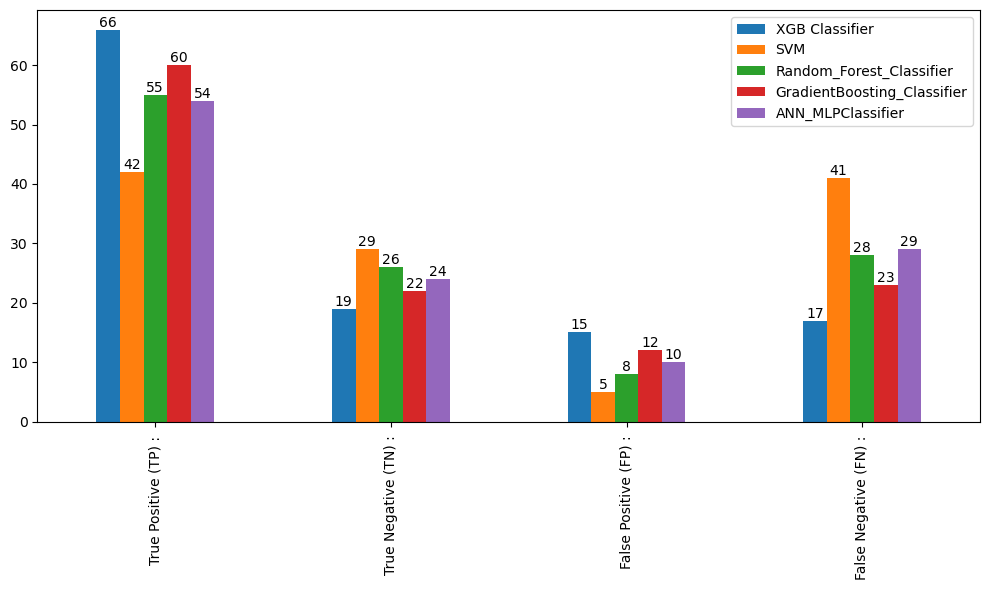

In [61]:
Classes = pd.DataFrame({'XGB Classifier' : XGB_RSCV_Model_Classes,
                        'SVM' : SVC_GSCV_Model_Classes,
                        'Random_Forest_Classifier' : RF_RSCV_Model_Classes,
                        'GradientBoosting_Classifier' : GB_RSCV_Model_Classes,
                        'ANN_MLPClassifier' : ANN_RSCV_Model_Classes
                       })


ax = Classes.plot.bar(figsize=(10,6));
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

## Let's Compare Different Model Metric :(After Hyprameter Tuning)

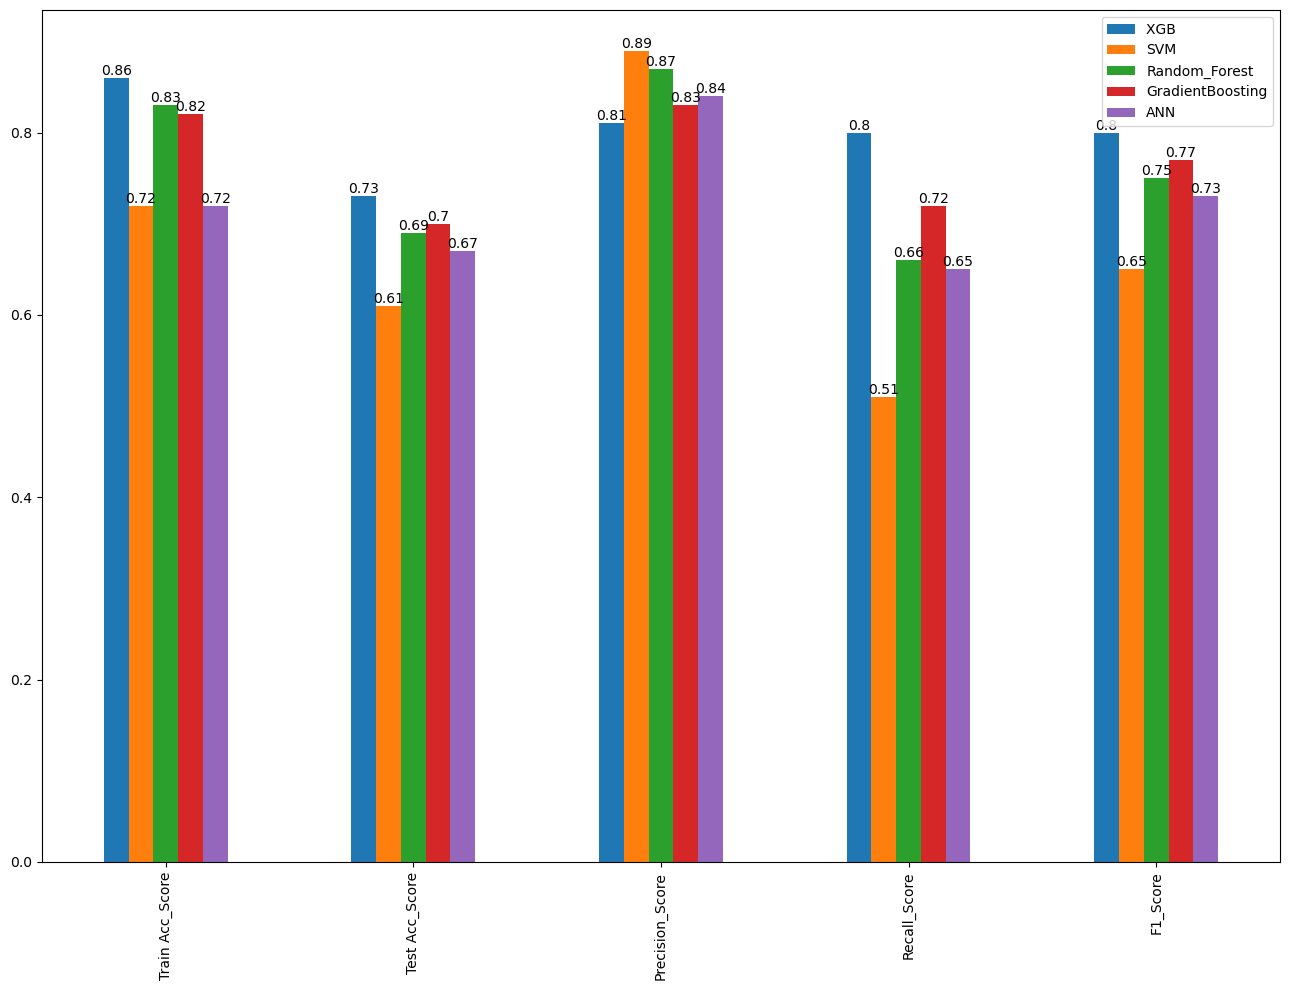

In [62]:
Metric = pd.DataFrame({'XGB ' : XGB_RSCV_Model_Metric,
                        'SVM' : SVC_GSCV_Model_Metric,
                        'Random_Forest' : RF_RSCV_Model_Metric,
                        'GradientBoosting' : GB_RSCV_Model_Metric,
                        'ANN' : ANN_RSCV_Model_Metric
                      })


ax = Metric.plot.bar(figsize=(13,10));
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

##  Let's Compare Different Model AUC_ROC :(After Hyprameter Tuning)

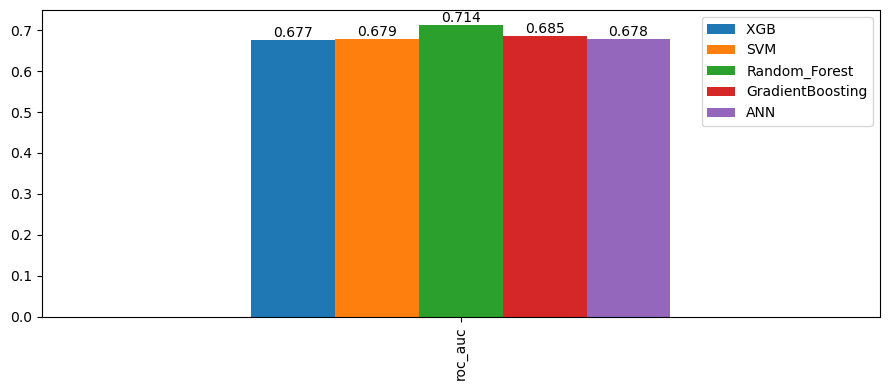

In [63]:
auc_roc = pd.DataFrame({'XGB ' : XGB_RSCV_Model_AUC_ROC ,
                        'SVM' : SVC_GSCV_Model_AUC_ROC ,
                        'Random_Forest' : RF_RSCV_Model_AUC_ROC ,
                        'GradientBoosting' : GB_RSCV_Model_AUC_ROC ,
                        'ANN' : ANN_RSCV_Model_AUC_ROC 
                      })


ax = auc_roc.plot.bar(figsize=(9,4));
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f')
plt.tight_layout()
plt.show()

<span style="color:limegreen;font-size:20pt;font-family: Arial Black;"> Final Observations : </span>
<span style="color:crimson;font-size:13pt;font-family:  cursive;"> <i> <br> <b>    
    * The count of female patient(24%) is very less than the count of male patient(76%) in the dataset.<br><br>
    * So It is showing that the count of male patient(75%) having liver disease is more that the count of female patient(25%)
      having liver disease . So more male patients are diagonised with Liver Disease.<br><br>
    * On the whole,there is an imbalance in class 0(Non Liver Patient - 29%) and Class 1(Liver Patient - 71% ).<br><br> 
    * So Smote is applied to balance the Class 0 and Class1.<br><br>
    * Even after aplying the SMOTE , still i see that the count of Class 0 and class 1 is not balanced in the 
      classification report.<br><br>
    * From the data set , the independent variable is not having linear relationship with the target variable.<br><br>
    * MinMax scaling is used to normalize the features,to transform features to be on a similar scale (since all the features
      were not on the same scale).<br><br>
    * Used Heat map and chi2 test to find the highly correlated features and then droping one of the two features that 
      hold the same information to avoid adding complexity to the model .<br><br>
    * The distribution of some columns are highly skewed. Also the count of outliers were more in each column .
      Since the dataset is very less decided to leave the outliers as it is without handeling them.<br><br>
    * Implemented 7 different Machine learning Classification algorithm(LogisticRegression, SVM, RandomForest_Classifier,
       XGBoost_Classifier, GradientBoosting_Classifier,ANN_MLPClassifier,BernoulliNaiveBayes) for our model prediction 
       and observed how each models 
      performed with the help of evaluation metics like accuracy, precision and f1 score , False Negative , 
      False Positive.<br><br>
    * Overall the tree based algorithm gave better result but with overfitting.<br><br>
    * Out of which , choosing 5 best model(SVM, RandomForest_Classifier, XGBoost_Classifier, GradientBoosting_Classifier, 
      ANN_MLPClassifier)and aplied hyperparameter tuning . After tuning , the XGBoost and Gradient Boosting 
      algorithms gave best result than other models.<br><br>    
    * Since the data set is too small and imbalanced , even after hyperparameter tuning , Not able to reduce the 
      False negative count.<br><br>
    * Since this is a medical based dataset , it is very important and necessary to have a very small False Negative 
      count so that the patients having liver disease are not MISS classified(diagnosed). <br><br>
    * But there is no harm when there is a False positive count because the patients who are miss classified (diagnosed) 
      can reconfirm with the next test that they dont have Liver Disease.<br><br>
    * So choosing XGBOOST CLASSIFIER , since it is giving less False Negative count.<br>
    
 </b> </i> </span>
    


<span style="color:limegreen;font-size:20pt;font-family: Arial Black;"> Conclusion : </span>
<span style="color:crimson;font-size:13pt;font-family:  cursive;"> <i> <br> <b>    
Overall ,<br>
    * Finally concluding that the XGBOOST CLASSIFIER (After Hyperparameter Tuning ) is giving better result based on the 
      following reasons.<br><br>
    * Both the train and test accuracy is very good.<br><br>
    * XGBoost gave the highest recall score and F1 Score compared to other models.<br><br>
    * The weighted average score is around 73%.<br><br>
    * Out of all the other models , this model is giving the least False Negative count and False positive count which is 
      really important for this medical dataset.<br><br>
    * When we still wanted to reduce the False negative count , the model tends to overfit. So not able to bring down the 
      False Negative count.<br><br>
    * Further to Improve the accuracy we Need more data , and adjusting the Hyperparameter will
      definetely give some Best Parameters.<br><br>
    * With this small dataset , this is the best acurracy we can achieve.<br><br>
    * Generally more the data , better the model accuracy , Better balancing of classes and reduction of False Negative 
      count.<br>
 </b> </i> </span>

<span style="color:limegreen;font-size:20pt;font-family: Arial Black;"> Challenges faced : </span>
<span style="color:crimson;font-size:13pt;font-family:  cursive;"> <i> <br> <b>    
    * Since this is a small dataset , even after hyperparameter tuning , the False Negative count is not coming down.<br><br>
    * For feature selection , tried information gain . But for this dataset , the score for each feature kept changing for 
      each run. So tried Chi2 test , which gave better clarity on which feature is highly corelated with target variable.<br><br>
    * In the Hyperparameter tuning (random search cv) , when scoring parameter was given as 'recall' , The model tends 
      to concentrate only on recall score . It is not considering the precision score . So changed the scoring as 'f1' as 
      that gives a balanced score for both precision and recall.<br><br>
    * Even after hyperparameter tuning , the SVM gives the highest False Negative count.<br> <br>
    * Since the dataset is non linear , the logistic regression gave a poor score.<br><br>  
     </b> </i> </span>